In [ ]:
import requests
import csv
import pandas as pd
import os
import xlrd
import glob
import re
from tqdm.notebook import tqdm
import json
import bs4
from urllib.request import urlopen
import urllib.request as urllib2
from flask import request, url_for, redirect
import numpy as np

In [ ]:
oik = pd.read_excel('C:/Users/pkath/OneDrive/Рабочий стол/Диплом 2023/Data/Votes/GD_votes.xlsx', sheet_name = 6)
oik['Party_shr'] = pd.to_numeric(oik['Party_shr'].replace(to_replace ='%', value = '', regex = True))
oik['Party_voters'] = (oik['Party_num']/oik['Party_shr']).apply(lambda x: x*100)
oik = oik.groupby(['region', 'year']).sum()
oik['Party_shr'] = 100*oik['Party_num']/oik['Party_voters']
oik = oik.reset_index().sort_values(['year', 'region'])
oik

,region,year,Party_num,Party_shr,Party_voters
170,Агинский Бурятский автономный округ,2007,33503,83.240000,4.024868e+04
171,Алтайский край,2007,666941,54.684959,1.219606e+06
173,Амурская область,2007,316190,69.750000,4.533190e+05
175,Архангельская область,2007,312249,56.720000,5.505095e+05
177,Астраханская область,2007,273921,58.000000,4.722776e+05
...,...,...,...,...,...
161,Ямало-Ненецкий автономный округ,2021,174561,68.920000,2.532806e+05
163,Ярославская область,2021,129262,29.724710,4.348638e+05
165,город Москва,2021,1421415,36.966028,3.845193e+06
167,город Санкт-Петербург,2021,514447,34.991538,1.470204e+06


In [ ]:
oik.to_excel('C:/Users/pkath/OneDrive/Рабочий стол/Диплом 2023/Data/Votes/GD_votes16_21.xlsx', engine='xlsxwriter')

In [ ]:
vote_p = pd.read_excel('C:/Users/pkath/OneDrive/Рабочий стол/Диплом 2023/Data/Votes/GD_votes.xlsx', sheet_name = 0)
id = pd.read_excel('C:/Users/pkath/OneDrive/Рабочий стол/Диплом 2023/Data/id.xlsx')

In [ ]:
vote_p = vote_p.merge(id, on='region', how='left')
vote_p['Party_shr'] = pd.to_numeric(vote_p['Party_shr'].replace(to_replace ='%', value = '', regex = True))
vote_p['Party_voters'] = (vote_p['Party_num']/vote_p['Party_shr']).apply(lambda x: x*100)

In [ ]:
vote_p.sort_values('id')
vote_p.to_excel('C:/Users/pkath/OneDrive/Рабочий стол/Диплом 2023/Data/Партия.xlsx', engine='xlsxwriter')

NameError: name 'vote_p' is not defined

In [ ]:
reg05_20 = pd.read_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Доходы.xlsx')
reg05_20 = reg05_20[reg05_20['id'] != 0]
reg05_20.head(10)
#1 130 913 455,55  180 406 700  45 613 900,00  429 660 000,00  1 675 347 400,00  1 217 849 700.00

,id,name,G1,G2,G3,doxod,year
9,1,Республика Башкортостан,0.000000,0.000000,1.130913,70.615268,2005
10,1,Республика Башкортостан,0.000000,0.000000,18.040670,69.858207,2006
11,1,Республика Башкортостан,0.000000,129.508760,4.561390,92.579552,2007
12,1,Республика Башкортостан,255.309850,237.085350,0.000000,116.538216,2008
13,1,Республика Башкортостан,278.065010,213.376810,42.966000,114.095746,2009
14,1,Республика Башкортостан,516.503700,335.008660,167.534740,119.726267,2010
15,1,Республика Башкортостан,6.066449,4.619302,1.217850,135.357683,2011
16,1,Республика Башкортостан,5.071741,4.200499,0.727991,145.155461,2012
17,1,Республика Башкортостан,5.216033,2.306324,2.751147,154.027499,2013
18,1,Республика Башкортостан,12.186221,6.406127,5.612874,165.740887,2014


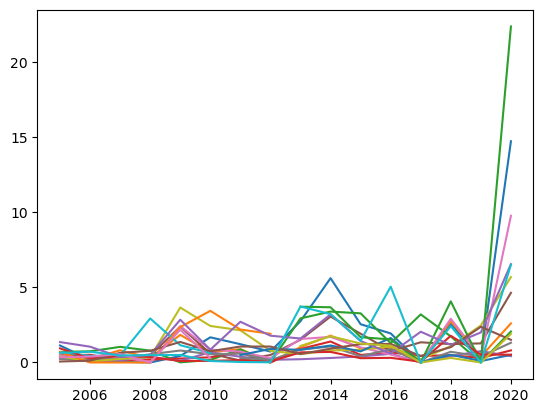

In [ ]:
import matplotlib.pyplot as plt
for region in reg05_20['name'].unique()[:20]:
    plt.plot(reg05_20[reg05_20['name']==region]["year"], reg05_20[reg05_20['name']==region]["G3"])

In [ ]:
for i in range(len(reg05_20['year'])):
    if reg05_20.iloc[i, 6] >= 2006 and reg05_20.iloc[i, 6] < 2011 and reg05_20.iloc[i, 4] > 0:
        reg05_20.iloc[i, 4] = reg05_20.iloc[i, 4]/100
    if reg05_20.iloc[i, 6] >= 2006 and reg05_20.iloc[i, 6] < 2011 and reg05_20.iloc[i, 3] > 0:
        reg05_20.iloc[i, 3] = reg05_20.iloc[i, 3]/100
    if reg05_20.iloc[i, 6] >= 2006 and reg05_20.iloc[i, 6] < 2011 and reg05_20.iloc[i, 2] > 0:
        reg05_20.iloc[i, 2] = reg05_20.iloc[i, 2]/100

reg05_20.head(10)

#1 130 913 455,55  180 406 700  45 613 900,00  429 660 000,00  1 675 347 400,00  1 217 849 700.00

1.130913

,id,name,G1,G2,G3,doxod,year
9,1,Республика Башкортостан,0.000000,0.000000,1.130913,70.615268,2005
10,1,Республика Башкортостан,0.000000,0.000000,0.180407,69.858207,2006
11,1,Республика Башкортостан,0.000000,1.295088,0.045614,92.579552,2007
12,1,Республика Башкортостан,2.553098,2.370853,0.000000,116.538216,2008
13,1,Республика Башкортостан,2.780650,2.133768,0.429660,114.095746,2009
14,1,Республика Башкортостан,5.165037,3.350087,1.675347,119.726267,2010
15,1,Республика Башкортостан,6.066449,4.619302,1.217850,135.357683,2011
16,1,Республика Башкортостан,5.071741,4.200499,0.727991,145.155461,2012
17,1,Республика Башкортостан,5.216033,2.306324,2.751147,154.027499,2013
18,1,Республика Башкортостан,12.186221,6.406127,5.612874,165.740887,2014


In [ ]:
reg05_20.to_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Доходы_05_20.xlsx', index = False)

Объединение дф

In [ ]:
vote = pd.read_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Президент.xlsx')
#grants = pd.read_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Доходы_05_20.xlsx')
grants = pd.read_stata("C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Code/merged.dta")

In [ ]:
id_year = grants[['id', 'year']]
id_year['period'] = np.nan
for i in id_year.index: #range(len(grants['id']))
    if id_year.iloc[i, 1] == 2005 or id_year.iloc[i, 1] == 2006 or id_year.iloc[i, 1] == 2007:
        id_year.iloc[i, 2] = 1
    if id_year.iloc[i, 1] == 2008 or id_year.iloc[i, 1] == 2009 or id_year.iloc[i, 1] == 2010 or id_year.iloc[i, 1] == 2011:
        id_year.iloc[i, 2] = 2
    if id_year.iloc[i, 1] == 2012 or id_year.iloc[i, 1] == 2013 or id_year.iloc[i, 1] == 2014 or id_year.iloc[i, 1] == 2015 or id_year.iloc[i, 1] == 2016 or id_year.iloc[i, 1] == 2017:
        id_year.iloc[i, 2] = 3
    if id_year.iloc[i, 1] == 2018 or id_year.iloc[i, 1] == 2019 or id_year.iloc[i, 1] == 2020:
        id_year.iloc[i, 2] = 4

twofour = id_year[id_year['year'] == 2005]
twofour['year'] = twofour['year']-1
id_year_party = id_year.append(twofour).sort_values(by = ['id', 'year'])
id_year_party

C:\Users\HP\AppData\Local\Temp\ipykernel_13060\1234636778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_year['period'] = np.nan


,year,period
id,,
1,2005,1.0
1,2006,1.0
1,2007,1.0
1,2008,2.0
1,2009,2.0
...,...,...
96,2012,3.0
96,2013,3.0
96,2014,3.0


In [ ]:
vote.set_index(['id','period', 'year'])


region  President_num  \
id   period year                                                                
1    1      2004                       Республика Башкортостан        2365768   
     2      2008                       Республика Башкортостан        2315467   
     3      2012                       Республика Башкортостан        1731716   
     4      2018                       Республика Башкортостан        1784626   
2    1      2004                            Республика Бурятия         298120   
...                                                        ...            ...   
1000 2      2008  Территория за пределами Российская Федерация         283298   
     3      2012  Территория за пределами Российская Федерация         323686   
     4      2018  Территория за пределами Российская Федерация         403306   
73   4      2018                                     г. Москва        3199214   
72   4      2018                            г. Санкт-Петербург        1735236   

                  President_shr  President_voters  
id   period year                                   
1    1      2004          91.78      2.577651e+06  
     2      2008          88.01      2.630914e+06  
     3      2012          75.28      2.300367e+06  
     4      2018          77.69      2.297112e+06  
2    1      2004          66.58      4.477621e+05  
...                         ...               ...  
1000 2      2008          85.80      3.301841e+05  
     3      2012          73.24      4.419525e+05  
     4      2018          85.02      4.743660e+05  
73   4      2018          70.87      4.514201e+06  
72   4      2018          75.01      2.313340e+06  

[348 rows x 4 columns]

In [ ]:
def get_log(x):
    return np.log(x) if x > 0 else -5

In [ ]:
df = grants.set_index(['id','period']).join(vote.set_index(['id','period']), lsuffix='_gr', rsuffix='_vo').reset_index()

#df[["G1", "G2", "G3"]] = (df[["G1", "G2", "G3"]] * 10e6).apply(lambda row: row / df.President_voters.loc[row.name], axis=1)

df['log_G1'] = df['G1'].apply(get_log)
df['log_G2'] = df['G2'].apply(get_log)
df['log_G3'] = df['G3'].apply(get_log)
df['log_pres_num'] = df['President_num'].apply(get_log)
df['log_pres_shr'] = df['President_shr'].apply(get_log)
df.name = df.name.str.strip().str.lower()
df = df[df["id"] != 0]

In [ ]:
df = id_year.set_index(['id','period']).join(vote.set_index(['id','period']), lsuffix='', rsuffix='_vo', how = 'outer').reset_index()
df.head()

,id,period,year,region,President_num,President_shr,year_vo,President_voters
0,1,1.0,2004.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06
1,1,1.0,2005.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06
2,1,1.0,2006.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06
3,1,1.0,2007.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06
4,1,2.0,2008.0,Республика Башкортостан,2315467.0,88.01,2008.0,2.630914e+06


In [ ]:
df = df.set_index(['id','period', 'year']).join(grants.set_index(['id','period', 'year']), lsuffix='_vo', rsuffix='', how = 'outer').reset_index()
df.head()

,id,period,year,region_vo,President_num,President_shr,year_vo,President_voters,region,G1,...,isRep,G_sum,logG1,logG2,logG_sum,rural,ifPartyEl,logpop,logincome,ifPresEl
0,1,1.0,2004.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,2005.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06,Республика Башкортостан,0.000000,...,1.0,1.130913,0.000000,0.756551,0.756551,40.200001,0.0,15.220087,4.257246,0.0
2,1,1.0,2006.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06,Республика Башкортостан,0.000000,...,1.0,0.180407,0.000000,0.165859,0.165859,40.200001,0.0,15.216656,4.246468,0.0
3,1,1.0,2007.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06,Республика Башкортостан,1.295088,...,1.0,1.340701,0.830771,0.044604,0.850451,40.000000,1.0,15.215246,4.528068,0.0
4,1,2.0,2008.0,Республика Башкортостан,2315467.0,88.01,2008.0,2.630914e+06,Республика Башкортостан,2.370853,...,1.0,2.370853,1.215166,0.000000,1.215166,39.900002,0.0,15.215978,4.758219,1.0


In [ ]:
df.to_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Общий_Президент.xlsx', index =False)

Party

In [ ]:
oik = pd.read_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Votes/GD_votes.xlsx', sheet_name = 6)
oik['Party_shr'] = pd.to_numeric(oik['Party_shr'].replace(to_replace ='%', value = '', regex = True))
oik['Party_voters'] = (oik['Party_num']/oik['Party_shr']).apply(lambda x: x*100)
oik = oik.groupby(['region', 'year']).sum()
oik['Party_shr'] = 100*oik['Party_num']/oik['Party_voters']
oik = oik.reset_index().sort_values(['year', 'region'])
oik

C:\Users\HP\AppData\Local\Temp\ipykernel_12216\706910299.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oik = oik.groupby(['region', 'year']).sum()


,region,year,Party_num,Party_shr,Party_voters
170,Агинский Бурятский автономный округ,2007,33503,83.240000,4.024868e+04
171,Алтайский край,2007,666941,54.684959,1.219606e+06
173,Амурская область,2007,316190,69.750000,4.533190e+05
175,Архангельская область,2007,312249,56.720000,5.505095e+05
177,Астраханская область,2007,273921,58.000000,4.722776e+05
...,...,...,...,...,...
161,Ямало-Ненецкий автономный округ,2021,174561,68.920000,2.532806e+05
163,Ярославская область,2021,129262,29.724710,4.348638e+05
165,город Москва,2021,1421415,36.966028,3.845193e+06
167,город Санкт-Петербург,2021,514447,34.991538,1.470204e+06


In [ ]:
vote = pd.read_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Партия.xlsx')
#grants = pd.read_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Доходы_05_20.xlsx')

In [ ]:
grants[grants['id'] == 1]

,id,name,G1,G2,G3,doxod,year
0,1,Республика Башкортостан,0.000000,0.000000,1.130913,70.615268,2005
1,1,Республика Башкортостан,0.000000,0.000000,0.180407,69.858207,2006
2,1,Республика Башкортостан,0.000000,1.295088,0.045614,92.579552,2007
3,1,Республика Башкортостан,2.553098,2.370853,0.000000,116.538216,2008
4,1,Республика Башкортостан,2.780650,2.133768,0.429660,114.095746,2009
5,1,Республика Башкортостан,5.165037,3.350087,1.675347,119.726267,2010
6,1,Республика Башкортостан,6.066449,4.619302,1.217850,135.357683,2011
7,1,Республика Башкортостан,5.071741,4.200499,0.727991,145.155461,2012
8,1,Республика Башкортостан,5.216033,2.306324,2.751147,154.027499,2013
9,1,Республика Башкортостан,12.186221,6.406127,5.612874,165.740887,2014


In [ ]:
vote

,Unnamed: 0,region,Party_num,Party_shr,Party_voters,year,period,id
0,48,Республика Башкортостан,864480,38.900000,2.222314e+06,2003,1,1
1,136,Республика Башкортостан,2170241,83.117252,2.611060e+06,2007,2,1
2,223,Республика Башкортостан,1684953,70.500444,2.389989e+06,2011,3,1
3,308,Республика Башкортостан,1456777,66.609425,2.187043e+06,2021,5,1
4,390,Республика Башкортостан,1195246,56.368012,2.120433e+06,2016,4,1
...,...,...,...,...,...,...,...,...
424,100,Город Байконур (Республика Казахстан),9285,74.010000,1.254560e+04,2007,2,96
425,186,Город Байконур (Республика Казахстан),4225,48.360000,8.736559e+03,2011,3,96
426,80,Ханты-Мансийский автономный округ - Югра,218404,41.250000,5.294642e+05,2003,1,87
427,273,Город Севастополь,93272,56.450000,1.652294e+05,2021,5,74


In [ ]:
grants['period'] = np.nan
for i in grants.index: #range(len(grants['id']))
    if grants.iloc[i, 6] == 2005 or grants.iloc[i, 6] == 2006 or grants.iloc[i, 6] == 2007:
        grants.iloc[i, 7] = 1
    if grants.iloc[i, 6] == 2008 or grants.iloc[i, 6] == 2009 or grants.iloc[i, 6] == 2010 or grants.iloc[i, 6] == 2011:
        grants.iloc[i, 7] = 2
    if grants.iloc[i, 6] == 2012 or grants.iloc[i, 6] == 2013 or grants.iloc[i, 6] == 2014 or grants.iloc[i, 6] == 2015 or grants.iloc[i, 6] == 2016:
        grants.iloc[i, 7] = 3
    if grants.iloc[i, 6] == 2017 or grants.iloc[i, 6] == 2018 or grants.iloc[i, 6] == 2019 or grants.iloc[i, 6] == 2020:
        grants.iloc[i, 7] = 4
grants.set_index('id')

,name,G1,G2,G3,doxod,year,period
id,,,,,,,
1,Республика Башкортостан,0.000000,0.000000,1.130913,70.615268,2005,1.0
1,Республика Башкортостан,0.000000,0.000000,0.180407,69.858207,2006,1.0
1,Республика Башкортостан,0.000000,1.295088,0.045614,92.579552,2007,1.0
1,Республика Башкортостан,2.553098,2.370853,0.000000,116.538216,2008,2.0
1,Республика Башкортостан,2.780650,2.133768,0.429660,114.095746,2009,2.0
...,...,...,...,...,...,...,...
96,г. Байконур,0.846048,0.000000,0.019414,3.122617,2016,3.0
96,г. Байконур,1.247032,0.000000,0.000000,3.456213,2017,4.0
96,г. Байконур,1.484090,0.000000,0.000000,3.667584,2018,4.0


In [ ]:
def get_log(x):
    return np.log(x) if x > 0 else -5


df[["G1", "G2", "G3"]] = (df[["G1", "G2", "G3"]] * 10e6).apply(lambda row: row / df.Party_voters.loc[row.name], axis=1)

df['log_G1'] = df['G1'].apply(get_log)
df['log_G2'] = df['G2'].apply(get_log)
df['log_G3'] = df['G3'].apply(get_log)
df['log_party_num'] = df['Party_num'].apply(get_log)
df['log_party_shr'] = df['Party_shr'].apply(get_log)
df = df[df["id"] != 0]
df.head(6)

,id,period,name,G1,G2,G3,doxod,year_gr,Unnamed: 0,region,Party_num,Party_shr,Party_voters,year_vo,log_G1,log_G2,log_G3,log_party_num,log_party_shr
9,1,1.0,Республика Башкортостан,0.000000,0.000000,5.088901,70.615268,2005,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,-5.000000,-5.000000,1.627062,13.669883,3.660994
10,1,1.0,Республика Башкортостан,0.000000,0.000000,81.179676,69.858207,2006,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,-5.000000,-5.000000,4.396665,13.669883,3.660994
11,1,1.0,Республика Башкортостан,0.000000,582.765450,20.525411,92.579552,2007,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,-5.000000,6.367785,3.021664,13.669883,3.660994
12,1,2.0,Республика Башкортостан,977.801684,908.004351,0.000000,116.538216,2008,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,6.885307,6.811249,-5.000000,14.590349,4.420252
13,1,2.0,Республика Башкортостан,1064.950824,817.203896,164.553883,114.095746,2009,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,6.970684,6.705889,5.103238,14.590349,4.420252
14,1,2.0,Республика Башкортостан,1978.138281,1283.037188,641.635060,119.726267,2010,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,7.589911,7.156985,6.464020,14.590349,4.420252


In [ ]:
df = grants.set_index(['id','period']).join(vote.set_index(['id','period']), lsuffix='_gr', rsuffix='_vo').reset_index()
df

,id,period,name,G1,G2,G3,doxod,year_gr,Unnamed: 0,region,Party_num,Party_shr,Party_voters,year_vo
0,1,1.0,Республика Башкортостан,0.000000,0.000000,1.130913,70.615268,2005,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0
1,1,1.0,Республика Башкортостан,0.000000,0.000000,0.180407,69.858207,2006,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0
2,1,1.0,Республика Башкортостан,0.000000,1.295088,0.045614,92.579552,2007,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0
3,1,2.0,Республика Башкортостан,2.553098,2.370853,0.000000,116.538216,2008,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0
4,1,2.0,Республика Башкортостан,2.780650,2.133768,0.429660,114.095746,2009,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,96,3.0,г. Байконур,0.846048,0.000000,0.019414,3.122617,2016,186.0,Город Байконур (Республика Казахстан),4225.0,48.360000,8.736559e+03,2011.0
1366,96,4.0,г. Байконур,1.247032,0.000000,0.000000,3.456213,2017,NaN,NaN,NaN,NaN,NaN,NaN
1367,96,4.0,г. Байконур,1.484090,0.000000,0.000000,3.667584,2018,NaN,NaN,NaN,NaN,NaN,NaN
1368,96,4.0,г. Байконур,2.345711,0.000000,0.000000,4.388421,2019,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grants = pd.read_stata("C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Code/merged.dta")
vote_pres = pd.read_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Президент.xlsx')
vote_party = pd.read_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Партия.xlsx')

vote_pres = vote_pres.rename(columns={'period':'period_pres'})
vote_party = vote_party.rename(columns={'period':'period_party'})

In [ ]:
vote_pres

,id,region,President_num,President_shr,year,period_pres,President_voters
0,1,Республика Башкортостан,2365768,91.78,2004,1,2.577651e+06
1,1,Республика Башкортостан,2315467,88.01,2008,2,2.630914e+06
2,1,Республика Башкортостан,1731716,75.28,2012,3,2.300367e+06
3,1,Республика Башкортостан,1784626,77.69,2018,4,2.297112e+06
4,2,Республика Бурятия,298120,66.58,2004,1,4.477621e+05
...,...,...,...,...,...,...,...
343,1000,Территория за пределами Российская Федерация,283298,85.80,2008,2,3.301841e+05
344,1000,Территория за пределами Российская Федерация,323686,73.24,2012,3,4.419525e+05
345,1000,Территория за пределами Российская Федерация,403306,85.02,2018,4,4.743660e+05
346,73,г. Москва,3199214,70.87,2018,4,4.514201e+06


In [ ]:
#party 2003, 2007, 2011, 2016, 2021
id_year = grants[['id', 'year']]

twothreefour = id_year[id_year['year'] == 2005]
twothree = twothreefour.copy()
twofour = twothreefour.copy()
twothree['year'] = twothreefour['year']-2
twofour['year'] = twothreefour['year']-1
id_year_party = id_year.append(twofour).append(twothree).sort_values(by = ['id', 'year'])

id_year_party['period'] = np.nan
for i in id_year_party.index: #range(len(grants['id']))
    if  id_year_party.iloc[i, 1] == 2003 or id_year_party.iloc[i, 1] == 2004 or id_year_party.iloc[i, 1] == 2005 or id_year_party.iloc[i, 1] == 2006:
        id_year_party.iloc[i, 2] = 1
    if  id_year_party.iloc[i, 1] == 2007 or id_year_party.iloc[i, 1] == 2008 or id_year_party.iloc[i, 1] == 2009 or id_year_party.iloc[i, 1] == 2010:
        id_year_party.iloc[i, 2] = 2
    if  id_year_party.iloc[i, 1] == 2011 or id_year_party.iloc[i, 1] == 2012 or id_year_party.iloc[i, 1] == 2013 or id_year_party.iloc[i, 1] == 2014 or id_year_party.iloc[i, 1] == 2015:
        id_year_party.iloc[i, 2] = 3
    if  id_year_party.iloc[i, 1] == 2016 or id_year_party.iloc[i, 1] == 2017 or id_year_party.iloc[i, 1] == 2018 or id_year_party.iloc[i, 1] == 2019 or id_year_party.iloc[i, 1] == 2020:
        id_year_party.iloc[i, 2] = 4



#president 2004, 2008, 2012, 2018
id_year = grants[['id', 'year']]

twofour = id_year[id_year['year'] == 2005]
twofour['year'] = twofour['year']-1
id_year_pres = id_year.append(twofour).sort_values(by = ['id', 'year'])

id_year_pres['period'] = np.nan
for i in id_year.index: #range(len(grants['id']))
    if id_year_pres.iloc[i, 1] == 2004 or id_year_pres.iloc[i, 1] == 2005 or id_year_pres.iloc[i, 1] == 2006 or id_year_pres.iloc[i, 1] == 2007:
        id_year_pres.iloc[i, 2] = 1
    if  id_year_pres.iloc[i, 1] == 2008 or id_year_pres.iloc[i, 1] == 2009 or id_year_pres.iloc[i, 1] == 2010 or id_year_pres.iloc[i, 1] == 2011:
        id_year_pres.iloc[i, 2] = 2
    if  id_year_pres.iloc[i, 1] == 2012 or id_year_pres.iloc[i, 1] == 2013 or id_year_pres.iloc[i, 1] == 2014 or id_year_pres.iloc[i, 1] == 2015 or id_year_pres.iloc[i, 1] == 2016 or id_year_pres.iloc[i, 1] == 2017:
        id_year_pres.iloc[i, 2] = 3
    if  id_year_pres.iloc[i, 1] == 2018 or id_year_pres.iloc[i, 1] == 2019 or id_year_pres.iloc[i, 1] == 2020:
        id_year_pres.iloc[i, 2] = 4



id_year_pres_party = id_year_pres.set_index(['id','year']).join(id_year_party.set_index(['id','year']), lsuffix='_pres', rsuffix='_party', how = 'outer').reset_index()

id_year_pres_party[id_year_pres_party['id']==1]

C:\Users\HP\AppData\Local\Temp\ipykernel_13060\3255542036.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_year_party = id_year.append(twofour).append(twothree).sort_values(by = ['id', 'year'])
C:\Users\HP\AppData\Local\Temp\ipykernel_13060\3255542036.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_year_party = id_year.append(twofour).append(twothree).sort_values(by = ['id', 'year'])
C:\Users\HP\AppData\Local\Temp\ipykernel_13060\3255542036.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofour['year'] = twofour['year']-1
C:\Users\HP\AppData\Local\Temp\

,id,year,period_pres,period_party
0,1,2003,NaN,1.0
1,1,2004,1.0,1.0
2,1,2005,1.0,1.0
3,1,2006,1.0,1.0
4,1,2007,1.0,2.0
5,1,2008,2.0,2.0
6,1,2009,2.0,2.0
7,1,2010,2.0,2.0
8,1,2011,2.0,3.0
9,1,2012,3.0,3.0


In [ ]:
grants['period_pres'] = np.nan
for i in grants.index: #range(len(grants['id']))
    if grants.iloc[i, 1] == 2005 or grants.iloc[i, 1] == 2006 or grants.iloc[i, 1] == 2007:
        grants.iloc[i, 19] = 1
    if grants.iloc[i, 1] == 2008 or grants.iloc[i, 1] == 2009 or grants.iloc[i, 1] == 2010 or grants.iloc[i, 1] == 2011:
        grants.iloc[i, 19] = 2
    if grants.iloc[i, 1] == 2012 or grants.iloc[i, 1] == 2013 or grants.iloc[i, 1] == 2014 or grants.iloc[i, 1] == 2015 or grants.iloc[i, 1] == 2016 or grants.iloc[i, 1] == 2017:
        grants.iloc[i, 19] = 3
    if grants.iloc[i, 1] == 2018 or grants.iloc[i, 1] == 2019 or grants.iloc[i, 1] == 2020:
        grants.iloc[i, 19] = 4

grants['period_party'] = np.nan
for i in grants.index: #range(len(grants['id']))
    if grants.iloc[i, 1] == 2003 or grants.iloc[i, 1] == 2004 or grants.iloc[i, 1] == 2005 or grants.iloc[i, 1] == 2006:
        grants.iloc[i, 20] = 1
    if  grants.iloc[i, 1] == 2007 or grants.iloc[i, 1] == 2008 or grants.iloc[i, 1] == 2009 or grants.iloc[i, 1] == 2010:
        grants.iloc[i, 20] = 2
    if  grants.iloc[i, 1] == 2011 or grants.iloc[i, 1] == 2012 or grants.iloc[i, 1] == 2013 or grants.iloc[i, 1] == 2014 or grants.iloc[i, 1] == 2015:
        grants.iloc[i, 20] = 3
    if  grants.iloc[i, 1] == 2016 or grants.iloc[i, 1] == 2017 or grants.iloc[i, 1] == 2018 or grants.iloc[i, 1] == 2019 or grants.iloc[i, 1] == 2020:
        grants.iloc[i, 20] = 4
    if  grants.iloc[i, 1] == 2021:
        grants.iloc[i, 20] = 1

grants[grants['id']==1]#['id', 'year','period_pres', 'period_party']]

,id,year,region,G1,G2,income,notrural_shr,poverty_shr,pop,isRep,...,logG1,logG2,logG_sum,rural,ifPartyEl,logpop,logincome,ifPresEl,period_pres,period_party
0,1,2005,Республика Башкортостан,0.000000,1.130913,70.615268,59.80,14.9,4073803.0,1.0,...,0.000000,0.756551,0.756551,40.200001,0.0,15.220087,4.257246,0.0,1.0,1.0
1,1,2006,Республика Башкортостан,0.000000,0.180407,69.858207,59.80,14.5,4059848.0,1.0,...,0.000000,0.165859,0.165859,40.200001,0.0,15.216656,4.246468,0.0,1.0,1.0
2,1,2007,Республика Башкортостан,1.295088,0.045614,92.579552,60.00,12.8,4054129.0,1.0,...,0.830771,0.044604,0.850451,40.000000,1.0,15.215246,4.528068,0.0,1.0,2.0
3,1,2008,Республика Башкортостан,2.370853,0.000000,116.538216,60.10,11.5,4057096.0,1.0,...,1.215166,0.000000,1.215166,39.900002,0.0,15.215978,4.758219,1.0,2.0,2.0
4,1,2009,Республика Башкортостан,2.133768,0.429660,114.095746,60.30,11.2,4063959.0,1.0,...,1.142236,0.357437,1.270723,39.700001,0.0,15.217669,4.737038,0.0,2.0,2.0
5,1,2010,Республика Башкортостан,3.350087,1.675347,119.726267,60.60,12.1,4070315.0,1.0,...,1.470196,0.984079,1.795990,39.400002,0.0,15.219231,4.785208,0.0,2.0,2.0
6,1,2011,Республика Башкортостан,4.619302,1.217850,135.357683,60.80,12.6,4068165.0,1.0,...,1.726207,0.796538,1.922371,39.200001,1.0,15.218702,4.907921,0.0,2.0,3.0
7,1,2012,Республика Башкортостан,4.200499,0.727991,145.155461,61.10,10.3,4062601.0,1.0,...,1.648755,0.546960,1.779770,38.900002,0.0,15.217334,4.977805,1.0,3.0,3.0
8,1,2013,Республика Башкортостан,2.306324,2.751147,154.027499,61.40,10.4,4065327.0,1.0,...,1.195837,1.322062,1.801293,38.599998,0.0,15.218005,5.037131,0.0,3.0,3.0
9,1,2014,Республика Башкортостан,6.406127,5.612874,165.740887,61.70,10.8,4070841.0,1.0,...,2.002308,1.889018,2.566410,38.299999,0.0,15.219360,5.110425,0.0,3.0,3.0


In [ ]:
df = id_year_pres_party.set_index(['id','period_party']).join(vote_party.set_index(['id', 'period_party']), lsuffix='', rsuffix='_party').reset_index()
df = df.set_index(['id','period_pres']).join(vote_pres.set_index(['id','period_pres']), lsuffix='', rsuffix='_pres').reset_index()
df[df['id']==1]


,id,period_pres,period_party,year,Unnamed: 0,region,Party_num,Party_shr,Party_voters,year_party,region_pres,President_num,President_shr,year_pres,President_voters
0,1,NaN,1.0,2003,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1.0,2004,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06
2,1,1.0,1.0,2005,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06
3,1,1.0,1.0,2006,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06
4,1,1.0,2.0,2007,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,Республика Башкортостан,2365768.0,91.78,2004.0,2.577651e+06
5,1,2.0,2.0,2008,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,Республика Башкортостан,2315467.0,88.01,2008.0,2.630914e+06
6,1,2.0,2.0,2009,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,Республика Башкортостан,2315467.0,88.01,2008.0,2.630914e+06
7,1,2.0,2.0,2010,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,Республика Башкортостан,2315467.0,88.01,2008.0,2.630914e+06
8,1,2.0,3.0,2011,223.0,Республика Башкортостан,1684953.0,70.500444,2.389989e+06,2011.0,Республика Башкортостан,2315467.0,88.01,2008.0,2.630914e+06
9,1,3.0,3.0,2012,223.0,Республика Башкортостан,1684953.0,70.500444,2.389989e+06,2011.0,Республика Башкортостан,1731716.0,75.28,2012.0,2.300367e+06


In [ ]:
df = df.set_index(['id', 'year','period_pres', 'period_party']).join(grants.set_index(['id','year','period_pres', 'period_party']), lsuffix='_vo', rsuffix='', how = 'left').reset_index()
#df = df.set_index(['id', 'year']).join(grants.set_index(['id', 'year','period_pres', 'period_party']), lsuffix='_vo', rsuffix='', how = 'outer').reset_index()

In [ ]:
df[df['id']==1]

,id,year,period_pres,period_party,Unnamed: 0,region_vo,Party_num,Party_shr,Party_voters,year_party,...,isRep,G_sum,logG1,logG2,logG_sum,rural,ifPartyEl,logpop,logincome,ifPresEl
0,1,2003,NaN,1.0,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2004,1.0,1.0,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2005,1.0,1.0,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,...,1.0,1.130913,0.000000,0.756551,0.756551,40.200001,0.0,15.220087,4.257246,0.0
3,1,2006,1.0,1.0,48.0,Республика Башкортостан,864480.0,38.900000,2.222314e+06,2003.0,...,1.0,0.180407,0.000000,0.165859,0.165859,40.200001,0.0,15.216656,4.246468,0.0
4,1,2007,1.0,2.0,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,...,1.0,1.340701,0.830771,0.044604,0.850451,40.000000,1.0,15.215246,4.528068,0.0
5,1,2008,2.0,2.0,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,...,1.0,2.370853,1.215166,0.000000,1.215166,39.900002,0.0,15.215978,4.758219,1.0
6,1,2009,2.0,2.0,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,...,1.0,2.563428,1.142236,0.357437,1.270723,39.700001,0.0,15.217669,4.737038,0.0
7,1,2010,2.0,2.0,136.0,Республика Башкортостан,2170241.0,83.117252,2.611060e+06,2007.0,...,1.0,5.025434,1.470196,0.984079,1.795990,39.400002,0.0,15.219231,4.785208,0.0
8,1,2011,2.0,3.0,223.0,Республика Башкортостан,1684953.0,70.500444,2.389989e+06,2011.0,...,1.0,5.837152,1.726207,0.796538,1.922371,39.200001,1.0,15.218702,4.907921,0.0
9,1,2012,3.0,3.0,223.0,Республика Башкортостан,1684953.0,70.500444,2.389989e+06,2011.0,...,1.0,4.928490,1.648755,0.546960,1.779770,38.900002,0.0,15.217334,4.977805,1.0


In [ ]:
df.to_excel('C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Data/Общий.xlsx', index =False)